
Identificación de tareas de visualización, búsqueda de codificaciones y generación de codificaciones mediante programación.

Cada ubicación tiene además información que se provee sobre los datos y las tareas que buscan completar en dicha codificación.
En cada una de estas ubicaciones se identifica una tarea (una acción y un objetivo.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## La gran pandemia

### Visualización 1

Durante el 2015 hubo una gran pandemia a nivel mundial. Luego de un año del descubrimiento del virus, se realizó un catastro de enfermos. Como es posible observar en el siguiente gráfico, los resultados indicaron que los países más afectados fueron Francia, Japón y México, con más de 9.5 millones, 10.2 millones y 10.3 millones de contagiados, respectivamente. Incluso, se puede observar que México tuvo aproximadamente el doble de casos que Corea.

Para esta visualización, se utilizan los datos del archivo V01.csv

**Visualización 1 (V01)**

**Tarea identificada**: Identificar extremos.

**Visualización elegida**: Gráfico de barras horizontales.

**Justificación de la visualización**: El gráfico de barras horizontales permite ver de forma efectiva los extremos y la distribución de casos por medio del orden, valores y largo de las barras.

In [3]:
# V01: Visualización que permite ver la cantidad total de infectados por país

v01 = pd.read_csv("V01.csv")
v01_ordenado = v01.sort_values(by="Contagiados", ascending=False)
v01_ordenado["Contagiados"] = v01_ordenado["Contagiados"].multiply(0.000001)
v01_ordenado.head()

,Paises,Contagiados
19,México,10.327423
18,Japón,10.248705
17,Francia,9.776457
16,Canadá,7.506864
15,India,7.498847


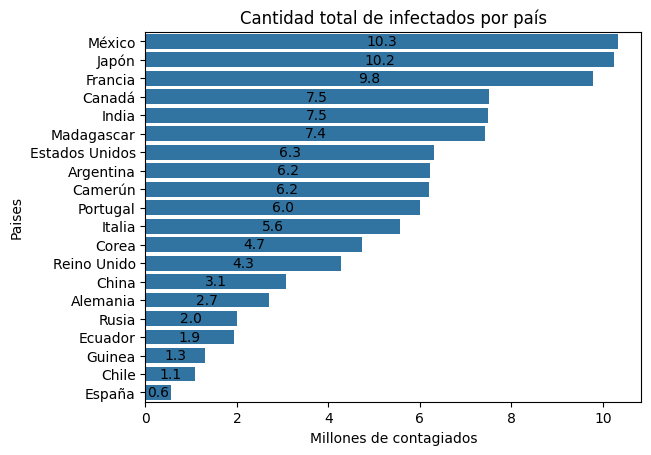

In [4]:
Grafico1= sns.barplot (data=v01_ordenado, x="Contagiados", y="Paises")
Grafico1.bar_label(Grafico1.containers[0], label_type = "center" , fmt = "%.1f")
Grafico1.set_xlabel("Millones de contagiados")
plt.title("Cantidad total de infectados por país")
plt.show()

### Visualización 2

Explorando los datos históricos de esta pandemia, fue posible recopilar la información de la cantidad de contagiados internacionalmente (en todo el mundo) durante los primeros 5 años y los resultados mostraron un crecimiento exponencial de los casos.

Para esta visualización, se utilizan los datos del archivo V02.csv

**Visualización 2 (V02)**

**Tarea identificada**: Descubrir tendencias.

**Visualización elegida**: Gráfico de líneas y puntos.

**Justificación de la visualización**: El gráfico de lineas y puntos permite observar claramente la evolución del total de contagiados a través de los años, por medio de la posición de los puntos y la inclinación de las lineas.

In [5]:
# V02: Visualización que permite ver la evolución del total de infectados en el tiempo (fecha).

v02 = pd.read_csv("V02.csv")
v02["Total Contagiados"] = v02["Total Contagiados"].multiply(0.000001)
v02["Año"] = v02["Año"].astype("string")
v02.head()

,Año,Total Contagiados
0,2013,104.778830
1,2014,168.031244
2,2015,248.136117
3,2016,372.664870
4,2017,550.371599


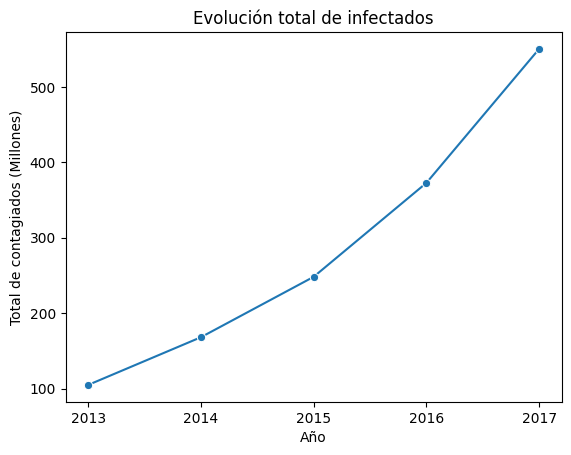

In [6]:
Grafico2= sns.lineplot(data=v02, x="Año", y="Total Contagiados", marker="o")
Grafico2.set_ylabel("Total de contagiados (Millones)")
plt.title("Evolución total de infectados")
plt.show()

### Visualización 3

Ahora, comparando la situación por país, es posible notar cómo en algunos países, como Chile, la infección fue controlada mientras en otros no, como México. Esto se explica por la anticipada toma de decisiones en políticas de salud en varios de estos países.

Para esta visualización se utilizan los datos del archivo V03.csv

**Visualización 3 (V03)**

**Tarea identificada**: Comparar tendencias.

**Visualización elegida**: Mapa de calor.

**Justificación de la visualización**: El mapa de calor con colores (con paises en las filas y los años en las columnas) permite comparar la tendencia por país por medio de los valores y colores de las celdas.

In [7]:
# V03: Visualización que permite ver el total de infectados en el tiempo por país (fecha).

v03 = pd.read_csv("V03.csv")
v03_melt = v03.melt(id_vars="Pais", var_name="Año", value_name="Infectados")
v03_pivoteado = v03_melt.pivot(index = "Pais", columns = "Año", values = "Infectados")
v03_pivoteado.head()

Año,2013,2014,2015,2016,2017
Pais,,,,,
Alemania,2692145,2600368,2507329,2417294,2326443
Argentina,6227225,12222367,22328738,33873404,34787538
Camerún,6199665,9437070,10742844,11400815,13245030
Canadá,7506864,9298814,11286926,11620020,22408837
Chile,1088398,997370,897734,798576,708325


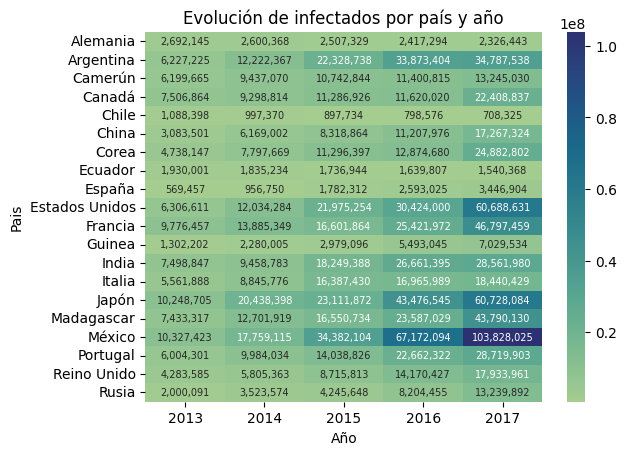

In [8]:
Grafico3= sns.heatmap(v03_pivoteado, annot = True, fmt = ",", annot_kws = {"size": 7}, cmap = "crest")
plt.title("Evolución de infectados por país y año")
plt.show()

### Visualización 4

Las visualizaciones anteriores colocan la evolución del contagios según las fechas de ocurrencia. No obstante, la realidad es que cada país tuvo su primer infectado en distintos momentos. Al encontrarse en distintas escalas de tiempo, surge la interrogante de cómo avanzó la distribución de contagios bajo una misma escala de tiempo, que corresponde al tiempo que lleva el país con infecciones presentes. 

Como ejemplo, observando el siguiente gráfico, se encontró que:

1. Cuando los países llevaban dos meses de infección (`mes=2`), el mínimo de contagios presentes en el mundo fue en un país con aproximadamente 1000 casos, el máximo fue de aproximadamente 8000 casos, y la mediana a nivel mundial fue de 3000 casos aproximadamente. 

2. Cuando los países llevaban un año de infección (`mes=12`), el mínimo de contagios presentes en el mundo fue en un país con aproximadamente 1800 casos, el máximo fue de aproximadamente 10000 casos, y la mediana a nivel mundial fue de 4000 casos aproximadamente. 

3. Finalmente, fue posible apreciar que en el cuarto mes de contagio, hay 2 países que tuvieron una cantidad atípica de contagidas.

Para esta visualización, se utilizan los datos del archivo V04.csv

**Visualización 4 (V04)**

**Tarea identificada**: Descubrir distribución.

**Visualización elegida**: Diagrama de cajas.

**Justificación de la visualización**: El diagrama de cajas muestra múltiples medidas que sustentan los hallazgos mencionados en el enunciado, estas se manifiestan a través de la posición y largo de las líneas y de los puntos que representan los outliers.

In [9]:
# V04: Visualización que permite ver la distribución de número de contagios de países en función al tiempo de infección.

v04 = pd.read_csv("V04.csv")
v04.head()

,Pais,Mes,Contagiados
0,Estados Unidos,1,5230
1,Estados Unidos,2,4785
2,Estados Unidos,3,4217
3,Estados Unidos,4,704
4,Estados Unidos,5,8694


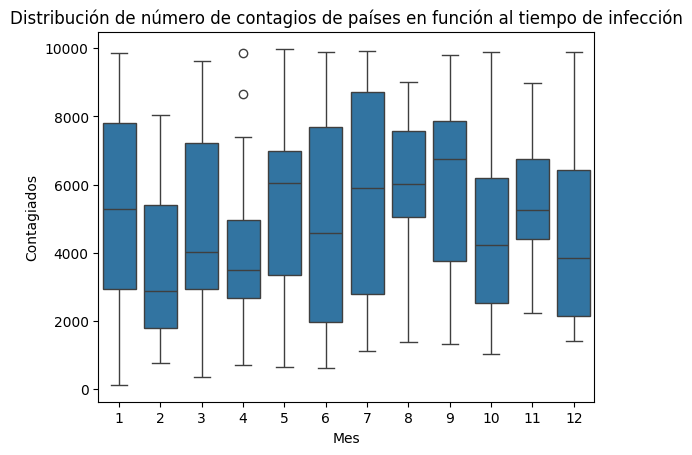

In [10]:
Grafico4= sns.boxplot(data= v04, x= "Mes", y = "Contagiados")
plt.title("Distribución de número de contagios de países en función al tiempo de infección")
plt.show()

### Visualización 5

Otra interrogante que surgió fue ¿este virus fue más letal en épocas y lugares de bajas temperaturas, de altas temperaturas o la temperatura no tuvo efecto? En base a los datos reunidos de facellimientos registrados por mes en los 5 primeros años, fue posible observar lo siguiente para cada hemisferio:

Para esta visualización, se utilizan los datos de los archivos V05-hem-norte.csv y V05-hem-sur.csv

**Visualización 5 (V05)**

**Tarea identificada**: Identificar tendencias.

**Visualización elegida**: Gráfico de lineas múltiple.

**Justificación de la visualización**: Los gráficos de lineas multiple permiten revisar la estacionalidad en cada hemisferio, y con ello determinar que en los meses de invierno hubieron mas fallecidos que en el verano. Esto se logra al observar la posición e inclinación de las lineas.

In [11]:
# V05: Dos visualizaciones (uno por hemisferio) permiten visualizar la cantidad de fallecimientos por mes y año. 
#      De modo que permite determinar si hubo algunos meses en particular donde aumentó la cantidad de fallecidos o
#      siempre se mantuvo de forma homogénea

v05n = pd.read_csv("V05-hem-norte.csv")
v05n.head()

,Año,Mes,Fallecidos
0,2013,01-Enero,243560
1,2013,02-Febrero,270623
2,2013,03-Marzo,284154
3,2013,04-Abril,213115
4,2013,05-Mayo,260474


In [12]:
v05s = pd.read_csv("V05-hem-sur.csv")
v05s.head()

,Año,Mes,Fallecidos
0,2013,07-Julio,243560
1,2013,08-Agosto,297685
2,2013,09-Septiembre,255738
3,2013,10-Octubre,202459
4,2013,11-Noviembre,260474


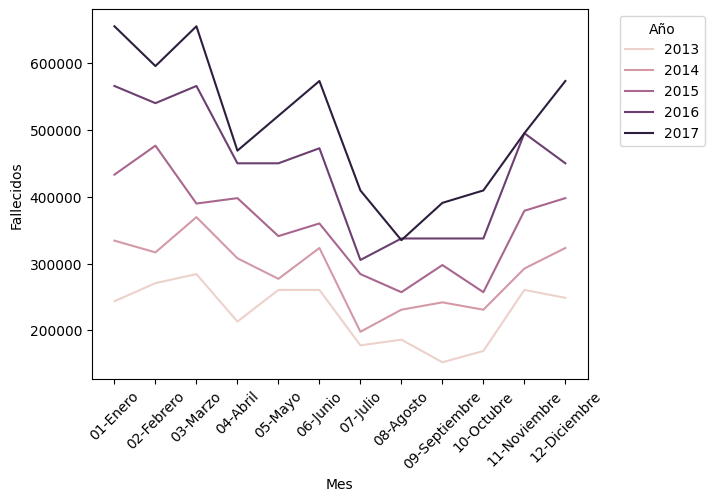

In [13]:
Grafico51= sns.lineplot(data = v05n, x = "Mes", y = "Fallecidos", hue ="Año")
plt.xticks(rotation=45)
plt.legend(title="Año", bbox_to_anchor=(1.25, 1))
plt.show()

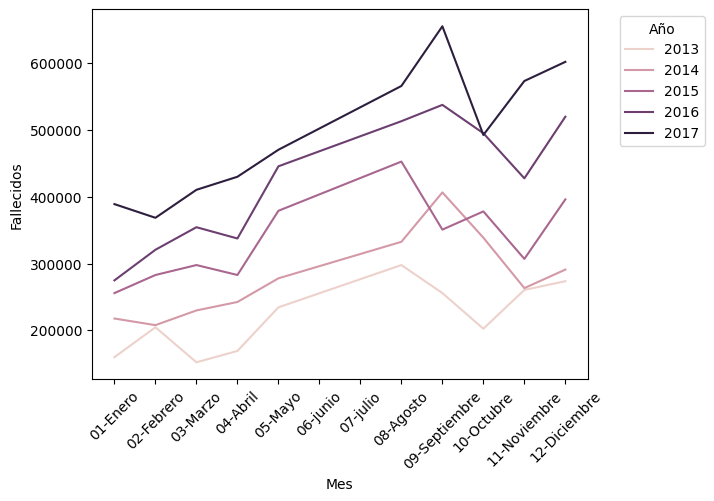

In [14]:
orden_meses = ["01-Enero", "02-Febrero", "03-Marzo", "04-Abril", "05-Mayo", "06-junio", "07-julio", "08-Agosto", "09-Septiembre", "10-Octubre", "11-Noviembre", "12-Diciembre"]
v05s["Mes"] = pd.Categorical(v05s["Mes"], categories=orden_meses, ordered=True)
Grafico52= sns.lineplot(data = v05s, x = "Mes", y = "Fallecidos", hue ="Año")
plt.xticks(rotation=45)
plt.legend(title="Año", bbox_to_anchor=(1.25, 1))
plt.show()

### Visualización 6

Por otro lado, esta pandemia que se caracterizó por una división etárea muy marcada entre sus contagiados. Cómo se observa en la visualización, el 60% de los contagiados eran personas sobre 50 años, 30% eran menores a los 18 años y solo el 10% restante oscila entre 19 y 49 años. Por otro lado, la segunda visualización muestra que el 80% presentaba como síntomas base: fiebre, tos y malestar estomacal; mientras que el 20% restante presentó síntomas extendidos a los anteriores, agregando dificultad para respirar. 

Para esta visualización, se utilizan los datos del archivo V06.csv

**Visualización 6 (V06)**

**Tarea identificada**: Presentar features.

**Visualización elegida**: Gráfico de torta.

**Justificación**: El gráfico de torta permite mostrar efectivamente la composición por caracteristicas (grupos etareos y sintomas), ya que la cantidad de categorias de ambas variables es menor a 3 y el area, en conjunto con los colores, funcionan bien.

In [15]:
# V06: Dos visualizaciones que permiten mostrar la proporción de infectados por edad 
#      y la proporción de síntomas posibles.
#      Hint: ambas visualizaciones son del mismo tipo.

v06 = pd.read_csv("V06.csv")
v06.head()

,Edad,Sintomas
0,>=50,base
1,>=50,base
2,>=50,base
3,>=50,base
4,>=50,base


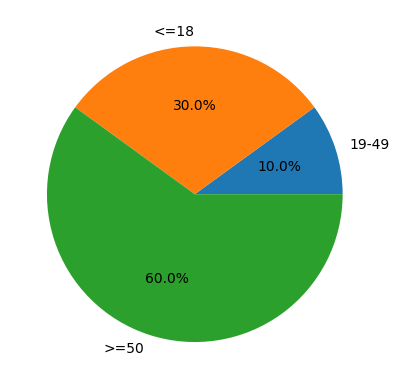

In [16]:
Grupo_etareo= v06.groupby("Edad", observed=True).size()
Grupo_etareo= Grupo_etareo / Grupo_etareo.sum()
Grafico61= plt.pie(Grupo_etareo, autopct="%1.1f%%", labels=Grupo_etareo.index)

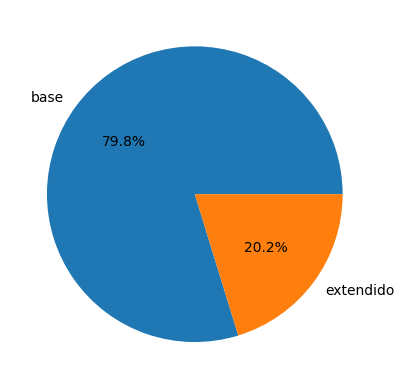

In [17]:
Tipo_sintomas = v06.groupby("Sintomas", observed = True).size()
Tipo_sintomas = Tipo_sintomas / Tipo_sintomas.sum()
Grafico62 = plt.pie(Tipo_sintomas, autopct="%1.1f%%", labels=Tipo_sintomas.index)

### Visualización 7

Además de esta segmentación etarea y de diagnóstico, la investigación inicial no tenía una caracterización más profunda. Fue tras cruzar únicamente pares de atributos (peso vs edad, altura vs edad y altura vs peso) y analizar su correlación junto con una segmentación por tipo de síntomas, es que se logró obtener una mejor descripción de perfiles. Este cruce y análisis se evidencia en la siguiente visualización.

Para esta visualización se utilizan los datos del archivo V07.csv

**Visualización 7 (V07)**

**Tarea identificada**: Descubrir correlación.

**Visualización elegida**: Matriz de graficos de dispersión.

**Justificación**: La matriz de gráficos de dispersión permite explorar las distintos combinaciones entre las variables disponibles y encontrar posibles correlaciones por medio de la observación de las posiciones y colores de los puntos.

In [18]:
# V07: Una visualización que permite apreciar distribución y potencialmente correlación entre 
#      pares de atributos de dataset: edad, peso y altura; con categorización por tipos de 
#      síntomas presentados.

v07 = pd.read_csv("V07.csv")
v07.head()

,Edad,Sintomas,Peso,Altura
0,70,base,72,155
1,71,base,61,161
2,83,base,66,179
3,77,base,63,190
4,76,base,80,164


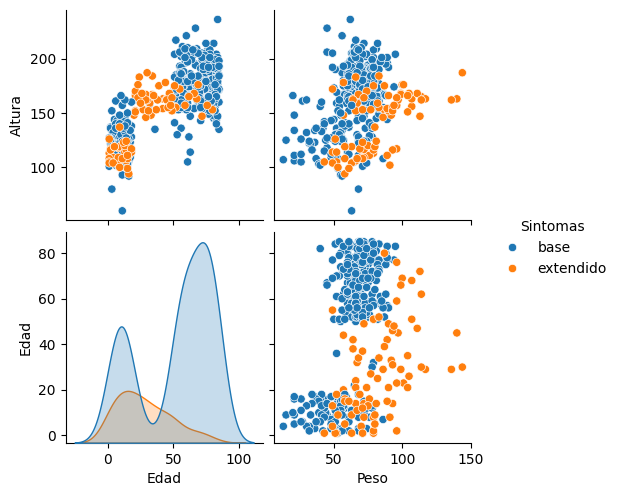

In [19]:
Grafico7 = sns.pairplot(data = v07, x_vars = ["Edad", "Peso"], y_vars = ["Altura", "Edad"], hue = "Sintomas")